In [41]:
import numpy as np
import pandas as pd
import os,sys
import matplotlib.pyplot as plt

In [42]:
exp_type = 'exp_nonlocal'
decoding_file = os.path.join(os.getcwd(),os.pardir,'results',exp_type,'decoding.csv')
decoding_data = pd.read_csv(decoding_file)


In [33]:
print(decoding_data.head())
print('len',len(decoding_data))

     pos_GOP  phi1_GOP  phi2_GOP  phi3_GOP    pos_NET  phi1_NET  phi2_NET   
0  99.363474  0.421788  1.388590  5.869770  99.365135  0.420964  1.395496  \
1  99.375016  0.727485  1.273932  5.880077  99.378810  0.741213  1.272439   
2  99.266642  0.304419  1.087685  5.933089  99.266920  0.307340  1.097713   
3  99.194817  6.219203  1.293709  5.764005  99.192140  6.238886  1.299364   
4  99.595651  1.353396  1.424085  6.003084  99.592766  1.342111  1.424100   

   phi3_NET  pos_MAP  phi1_MAP  phi2_MAP  phi3_MAP  
0  5.874348   99.375  0.376991  1.382301  5.906194  
1  5.884507   99.375  0.753982  1.256637  5.906194  
2  5.928547   99.250  0.251327  1.130974  5.906194  
3  5.759859    8.875  6.157522  1.507965  5.654867  
4  6.001447   99.625  1.382301  1.382301  6.031858  
len 500


### Give parameters of environment informaiton

In [34]:
from scipy.optimize import curve_fit

# 定义高斯函数
def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) ** 2) / (2 * stddev ** 2))


In [35]:
save_path = os.path.join(os.getcwd(),os.pardir,'figures')
if not os.path.exists(save_path):
    os.makedirs(save_path)

In [36]:
fontsize = 22
linewidth = 3.
figsize=(6, 5)
legend_fontsize = 12
# color=['#FF6961', '#B19CD9', '#77DD77']
# color=['blue', 'orange', 'grey']
# color = ['#F5E09B','#B7DBE3','#DFE1E2']
# color = ['#F3C846', '#9ec6db', '#B19CD9']
color = ['#E89DA0','#88CEE6','#B2D3A4']

C:\Users\QWT\AppData\Local\Temp\ipykernel_23572\2435874094.py:61: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


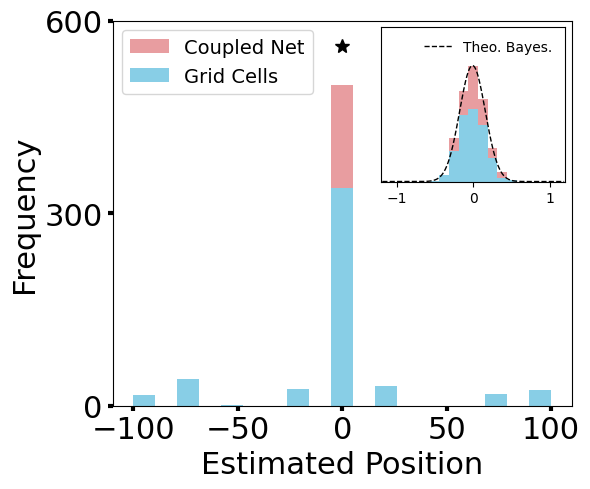

In [48]:
fontsize = 22
linewidth = 3.
figsize=(6, 5)
legend_fontsize = 14
L = 200
n_bins = 20  # Adjust the number of bins for better visualization
bins = np.linspace(-L//2, L//2, n_bins)
mean_gt = 99.5

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
plt.figure(figsize=(6, 5))  # Increase figure size for better readability
label1 = 'Coupled Net'
label2 = 'Grid Cells'

# Main histogram plot
alpha1 = 1.0
alpha2 = 1.0
plt.hist(decoding_data['pos_NET']-mean_gt, bins=bins, alpha=alpha1, label=label1, color=color[0])
plt.hist(decoding_data['pos_MAP']-mean_gt, bins=bins, alpha=alpha2, label=label2, color=color[1])
plt.legend(loc='upper left', fontsize=legend_fontsize)
plt.xlabel('Estimated Position', fontsize=fontsize)
plt.ylabel('Frequency', fontsize=fontsize)
plt.ylim([0, 600])
# plot a star at the ground truth position
# can choose marker like: *, +, x, |, ., o, etc.
plt.plot([0], [560], marker='*', markersize=10, color='k')
# y axis just show 0, 300, 600
plt.yticks([0, 300, 600])
plt.gca().tick_params(width=linewidth)
plt.gca().tick_params(labelsize=fontsize)

# Add an inset axis to highlight the MAP distribution
ax_inset = inset_axes(plt.gca(), width="80%", height="80%", bbox_to_anchor=(0.5, 0.5, 0.5, 0.5), bbox_transform=plt.gca().transAxes)
# min_pos = min(decoding_data['pos_GOP'].min(), decoding_data['pos_NET'].min()) - 1.0 -mean_gt
# max_pos = max(decoding_data['pos_GOP'].max(), decoding_data['pos_NET'].max()) + 1.0 -mean_gt
min_pos = -1.2
max_pos = 1.2
# ax_inset x lim [min_pos, max_pos], y is frequency
n_bins_inset = 20
bins_inset = np.linspace(min_pos, max_pos, n_bins_inset)

# 计算CSV数据的直方图
hist, bins = np.histogram(decoding_data['pos_GOP']-mean_gt, bins=bins_inset)
bin_centers = (bins[:-1] + bins[1:]) / 2
# 拟合高斯函数到数据
popt, _ = curve_fit(gaussian, bin_centers, hist, p0=[max(hist), np.mean(decoding_data['pos_GOP']-mean_gt), np.std(decoding_data['pos_GOP']-mean_gt)])
# 绘制CSV数据的高斯拟合曲线
x_fit = np.linspace(min(bin_centers)-0.05, max(bin_centers)+0.05, 1000)
y_fit = gaussian(x_fit, *popt)
ax_inset.plot(x_fit, y_fit, label='Theo. Bayes.', color='k', linestyle='--', linewidth=1.0, alpha=1.0)
ax_inset.hist(decoding_data['pos_NET']-mean_gt, bins=bins_inset, alpha=alpha1,color=color[0])
ax_inset.hist(decoding_data['pos_MAP']-mean_gt, bins=bins_inset, alpha=alpha2,color=color[1])
ax_inset.legend(loc='upper right', frameon = False, fontsize=10)
min_show = min(min_pos,-max_pos)
max_show = max(-min_pos,max_pos)
ax_inset.set_xlim(min_show, max_show)
ax_inset.set_ylim([0, 200])
# hide the y axis values and ticks
ax_inset.yaxis.set_visible(False)
# make all content in the saved figure visible
plt.tight_layout()
plt.savefig(os.path.join(save_path, 'nonlocal_z.png'))
plt.show()

In [38]:
phi1_GOP = decoding_data['phi1_GOP']
phi2_GOP = decoding_data['phi2_GOP']
phi3_GOP = decoding_data['phi3_GOP']
phi1_NET = decoding_data['phi1_NET']
phi2_NET = decoding_data['phi2_NET']
phi3_NET = decoding_data['phi3_NET']
phi1_MAP = decoding_data['phi1_MAP']
phi2_MAP = decoding_data['phi2_MAP']
phi3_MAP = decoding_data['phi3_MAP']


In [39]:
stim_pos = 99.5
phase1 = np.mod(stim_pos/3*2*np.pi,2*np.pi)
phase2 = np.mod(stim_pos/7*2*np.pi,2*np.pi)
phase3 = np.mod(stim_pos/10*2*np.pi,2*np.pi)
print('phase1',phase1,'phase2',phase2,'phase3',phase3)

phase1 1.0471975511965823 phase2 1.346396851538472 phase3 5.969026041820605


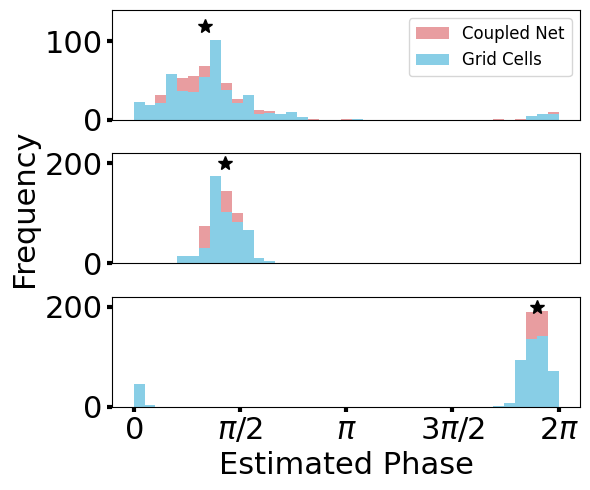

In [40]:
fontsize = 22
linewidth = 3.
figsize=(6, 5)
legend_fontsize = 12

L = 2*np.pi
n_bins = 40  # Adjust the number of bins for better visualization
bins = np.linspace(0, L, n_bins)

fig, axs = plt.subplots(3, 1, figsize=(6, 5))
label1 = 'Coupled Net'
label2 = 'Grid Cells'
axs[0].hist(phi1_NET, bins=bins, alpha=alpha1, label=label1, color=color[0])
axs[0].hist(phi1_MAP, bins=bins, alpha=alpha2, label=label2, color=color[1])
axs[0].legend(loc='upper right', fontsize=legend_fontsize)
# axs[0].set_ylabel('Frequency', fontsize=fontsize)
# axs[0].set_title('Phase 1', fontsize=fontsize)
axs[0].plot([phase1], [120], marker='*', markersize=10, color='k')
axs[0].set_ylim([0, 140])  # Set ylimit [0, 140]
# hide the x axis values and ticks
axs[0].xaxis.set_visible(False)

axs[1].hist(phi2_NET, bins=bins, alpha=alpha1, label=label1, color=color[0])
axs[1].hist(phi2_MAP, bins=bins, alpha=alpha2, label=label2, color=color[1])
axs[1].set_ylabel('Frequency', fontsize=fontsize)
# axs[1].set_title('Phase 2', fontsize=fontsize)
axs[1].set_ylim([0, 220])  # Set ylimit [0, 200]
axs[1].plot([phase2], [200], marker='*', markersize=10, color='k')
axs[1].xaxis.set_visible(False)

axs[2].hist(phi3_NET, bins=bins, alpha=alpha1, label=label1, color=color[0])
axs[2].hist(phi3_MAP, bins=bins, alpha=alpha2, label=label2, color=color[1])
axs[2].set_xlabel('Estimated Phase', fontsize=fontsize)
# axs[2].set_ylabel('Frequency', fontsize=fontsize)
# axs[2].set_title('Phase 3', fontsize=fontsize)
axs[2].set_ylim([0, 220])  # Set ylimit [0, 220]
axs[2].plot([phase3], [200], marker='*', markersize=10, color='k')
axs[2].set_xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
axs[2].set_xticklabels(['$0$', '$\pi/2$', '$\pi$', '$3\pi/2$', '$2\pi$'])

# tick_params for all axes
for ax in axs:
    ax.tick_params(width=linewidth, labelsize=fontsize)
plt.tight_layout()
plt.savefig(os.path.join(save_path, 'nonlocal_phi.png'))
plt.show()